In [1]:
import pickle
import numpy as np
import pandas as pd
import joblib as jb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('datadbd.csv', sep=',')
data.head()

,bln,keadaan,umur,jk,ntt,nhb,nhr,nht,dataset
0,11,1,50,2,15,15,39,42,2
1,1,1,10,2,73,13,39,40,1
2,10,1,12,1,96,14,41,42,2
3,9,1,3,2,98,13,36,46,1
4,5,1,7,2,72,12,37,40,2


In [3]:
label = data.iloc[:,8:].values.ravel()
label

array([2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1], dtype=int64)

In [4]:
feature = data.iloc[:,2:8]
feature.values

array([[ 50,   2,  15,  15,  39,  42],
       [ 10,   2,  73,  13,  39,  40],
       [ 12,   1,  96,  14,  41,  42],
       ...,
       [ 13,   2,  53,  15,  44,  45],
       [  7,   1, 106,  13,  37,  39],
       [  1,   2, 121,  12,  33,  38]], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature, label ,test_size=0.3)

In [6]:
print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji:", len(X_test))

Jumlah Data Latih: 193
Jumlah Data Uji: 83


In [7]:
knn=KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
pred = knn.predict(X_test)
pred

array([1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64)

In [10]:
cols = {
    'Y True' : y_test,
    'Predict' : pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

Prediksi Yang Dihasilkan


,Y True,Predict
0,2,1
1,2,2
2,1,1
3,1,1
4,2,2
...,...,...
78,1,1
79,1,2
80,2,2
81,1,2


In [11]:
print(metrics.accuracy_score(y_test, pred))

0.6626506024096386


In [12]:
confusion_matrix(y_test, pred)

array([[33, 17,  0],
       [ 8, 22,  1],
       [ 1,  1,  0]], dtype=int64)

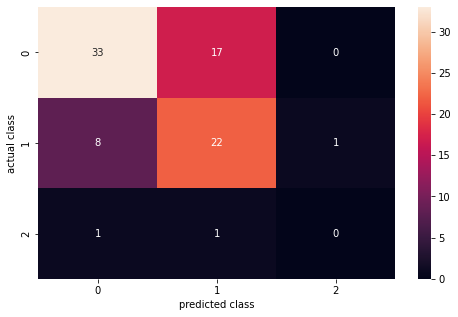

In [13]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".0f", ax=ax,)
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.show()

In [14]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.79      0.66      0.72        50
           2       0.55      0.71      0.62        31
           3       0.00      0.00      0.00         2

    accuracy                           0.66        83
   macro avg       0.45      0.46      0.45        83
weighted avg       0.68      0.66      0.66        83



In [15]:
with open('model_new.pkl','wb') as pickle_file:
    pickle.dump(knn, pickle_file)